In [69]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
import matplotlib.pyplot as plt
import numpy as np
language_model = spacy.load("en_core_web_sm")
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from collections import Counter


In [70]:
onion = pd.read_csv('/Users/ashash/Desktop/IS310 webs/data/theonion_scraped_articles.csv')
onion

,type,link,title,text
0,politics,https://theonion.com/youre-the-bonnie-to-my-cl...,"‘You’re The Bonnie To My Clyde,’ Says Biden Ru...","Black Friday Sale: Get the Paper. Wednesday, N..."
1,politics,https://theonion.com/fact-checking-rfk-jr-on-h...,Fact-Checking RFK Jr. On Health,"Black Friday Sale: Get the Paper. Wednesday, N..."
2,politics,https://theonion.com/nancy-mace-introduces-bil...,Nancy Mace Introduces Bill That Would Ban Tran...,"Black Friday Sale: Get the Paper. Wednesday, N..."
3,politics,https://theonion.com/political-profile-matt-ga...,Political Profile: Matt Gaetz,"Black Friday Sale: Get the Paper. Wednesday, N..."
4,politics,https://theonion.com/trump-admits-entire-polit...,Trump Admits Entire Political Career Has Been ...,"Black Friday Sale: Get the Paper. Wednesday, N..."
5,politics,https://theonion.com/trump-boys-get-weird-feel...,Trump Boys Get Weird Feeling After Uncle Elon ...,"Black Friday Sale: Get the Paper. Wednesday, N..."
6,politics,https://theonion.com/dnc-chair-its-not-a-waste...,DNC Chair: It’s Not A Waste Of Money If It Mak...,"Black Friday Sale: Get the Paper. Wednesday, N..."
7,politics,https://theonion.com/joe-biden-given-human-foo...,Joe Biden Given Human Food As Birthday Treat,"Black Friday Sale: Get the Paper. Wednesday, N..."
8,politics,https://theonion.com/trump-locks-bathroom-door...,Trump Locks Bathroom Door So Elon Musk Can’t F...,"Black Friday Sale: Get the Paper. Wednesday, N..."
9,politics,https://theonion.com/biden-authorizes-ukraine-...,Biden Authorizes Ukraine To Use Long-Range Wea...,"Black Friday Sale: Get the Paper. Wednesday, N..."


In [71]:
onion['text'] = onion['text'].str.replace('Black Friday Sale: Get the Paper. Wednesday, November 27, 2024 64° Electromagnetic storm, raining aircraft America’s Finest News Source Wednesday, November 27, 2024 64° Electromagnetic storm, raining aircraft Black Friday Sale: Get Merch. Share Share', '', regex=False)
onion['text'] = onion['text'].str.replace('Published: ', '', regex=False)
onion


,type,link,title,text
0,politics,https://theonion.com/youre-the-bonnie-to-my-cl...,"‘You’re The Bonnie To My Clyde,’ Says Biden Ru...",WASHINGTON—Participating in the annual tradit...
1,politics,https://theonion.com/fact-checking-rfk-jr-on-h...,Fact-Checking RFK Jr. On Health,"Robert F. Kennedy Jr., Donald Trump’s pick to..."
2,politics,https://theonion.com/nancy-mace-introduces-bil...,Nancy Mace Introduces Bill That Would Ban Tran...,WASHINGTON—With widespread support from her R...
3,politics,https://theonion.com/political-profile-matt-ga...,Political Profile: Matt Gaetz,President-elect Donald Trump selected Matt Ga...
4,politics,https://theonion.com/trump-admits-entire-polit...,Trump Admits Entire Political Career Has Been ...,"PALM BEACH, FL—Revealing that the stage was f..."
5,politics,https://theonion.com/trump-boys-get-weird-feel...,Trump Boys Get Weird Feeling After Uncle Elon ...,"PALM BEACH, FL—Blushing, short of breath, and..."
6,politics,https://theonion.com/dnc-chair-its-not-a-waste...,DNC Chair: It’s Not A Waste Of Money If It Mak...,Advertising Explore Tags Related Coverage Adv...
7,politics,https://theonion.com/joe-biden-given-human-foo...,Joe Biden Given Human Food As Birthday Treat,WASHINGTON—After bending the rules with a cel...
8,politics,https://theonion.com/trump-locks-bathroom-door...,Trump Locks Bathroom Door So Elon Musk Can’t F...,"PALM BEACH, FL—Admitting that ever since he j..."
9,politics,https://theonion.com/biden-authorizes-ukraine-...,Biden Authorizes Ukraine To Use Long-Range Wea...,"‘I’m Ready, Man,’ Declares Weary President WA..."


In [72]:
ap = pd.read_csv('/Users/ashash/Desktop/IS310 webs/data/apnews_scraped_articles.csv')
ap

,type,link,title,text
0,politics,https://apnews.com/article/trump-transition-uk...,Trump selects longtime adviser Keith Kellogg a...,Copyright 2024 The Associated Press. All Right...
1,politics,https://apnews.com/article/ukraine-war-biden-d...,White House pressing Ukraine to draft 18-year-...,Copyright 2024 The Associated Press. All Right...
2,politics,https://apnews.com/article/ozempic-biden-wegov...,How millions of Americans with obesity may get...,Copyright 2024 The Associated Press. All Right...
3,politics,https://apnews.com/article/immigration-school-...,Trump's mass deportation pledge could keep imm...,Copyright 2024 The Associated Press. All Right...
4,politics,https://apnews.com/article/ap-votecast-2020-el...,"AP VoteCast: How Americans voted in 2020, and ...",Copyright 2024 The Associated Press. All Right...
5,politics,https://apnews.com/article/new-orleans-mayor-c...,New Orleans mayor launches own 'news' service ...,Copyright 2024 The Associated Press. All Right...
6,politics,https://apnews.com/article/biden-trump-israel-...,Trump team says Israel-Hezbollah ceasefire dea...,Copyright 2024 The Associated Press. All Right...
7,politics,https://apnews.com/article/trump-biden-transit...,Trump signs agreement with Biden White House t...,Copyright 2024 The Associated Press. All Right...
8,politics,https://apnews.com/article/trump-transition-bo...,"Trump transition says Cabinet picks, appointee...",Copyright 2024 The Associated Press. All Right...
9,politics,https://apnews.com/article/us-china-americans-...,3 Americans held for years in China have been ...,Copyright 2024 The Associated Press. All Right...


In [73]:
ap['text'] = ap['text'].str.replace('Copyright 2024 The Associated Press. All Rights Reserved.', '', regex=False)
ap

,type,link,title,text
0,politics,https://apnews.com/article/trump-transition-uk...,Trump selects longtime adviser Keith Kellogg a...,FILE - Ret. Lt. Gen. Keith Kellogg speaks to ...
1,politics,https://apnews.com/article/ukraine-war-biden-d...,White House pressing Ukraine to draft 18-year-...,Fellow soldiers carry a coffin of leading act...
2,politics,https://apnews.com/article/ozempic-biden-wegov...,How millions of Americans with obesity may get...,FILE - Donna Cooper holds up a dosage of Wego...
3,politics,https://apnews.com/article/immigration-school-...,Trump's mass deportation pledge could keep imm...,FILE - An American flag hangs in a classroom ...
4,politics,https://apnews.com/article/ap-votecast-2020-el...,"AP VoteCast: How Americans voted in 2020, and ...",AP VoteCast looks at the top issues for Texas...
5,politics,https://apnews.com/article/new-orleans-mayor-c...,New Orleans mayor launches own 'news' service ...,NEW ORLEANS (AP) — New Orleans Mayor LaToya C...
6,politics,https://apnews.com/article/biden-trump-israel-...,Trump team says Israel-Hezbollah ceasefire dea...,President Joe Biden on Tuesday called Israel ...
7,politics,https://apnews.com/article/trump-biden-transit...,Trump signs agreement with Biden White House t...,President Joe Biden meets with President-elec...
8,politics,https://apnews.com/article/trump-transition-bo...,"Trump transition says Cabinet picks, appointee...",President-elect Donald Trump arrives to speak...
9,politics,https://apnews.com/article/us-china-americans-...,3 Americans held for years in China have been ...,FILE - Harrison Li holds a photo of his fathe...


In [74]:
onion['label'] = 0  # Label for The Onion (satirical news)
ap['label'] = 1     # Label for AP News (factual news)

# Combine the two dataframes
combined_df = pd.concat([onion, ap], ignore_index=True)

# Save the combined dataframe to a new CSV (optional)
combined_df.to_csv('combined_news.csv', index=False)

# Display the first few rows of the combined dataframe
combined_df


,type,link,title,text,label
0,politics,https://theonion.com/youre-the-bonnie-to-my-cl...,"‘You’re The Bonnie To My Clyde,’ Says Biden Ru...",WASHINGTON—Participating in the annual tradit...,0
1,politics,https://theonion.com/fact-checking-rfk-jr-on-h...,Fact-Checking RFK Jr. On Health,"Robert F. Kennedy Jr., Donald Trump’s pick to...",0
2,politics,https://theonion.com/nancy-mace-introduces-bil...,Nancy Mace Introduces Bill That Would Ban Tran...,WASHINGTON—With widespread support from her R...,0
3,politics,https://theonion.com/political-profile-matt-ga...,Political Profile: Matt Gaetz,President-elect Donald Trump selected Matt Ga...,0
4,politics,https://theonion.com/trump-admits-entire-polit...,Trump Admits Entire Political Career Has Been ...,"PALM BEACH, FL—Revealing that the stage was f...",0
5,politics,https://theonion.com/trump-boys-get-weird-feel...,Trump Boys Get Weird Feeling After Uncle Elon ...,"PALM BEACH, FL—Blushing, short of breath, and...",0
6,politics,https://theonion.com/dnc-chair-its-not-a-waste...,DNC Chair: It’s Not A Waste Of Money If It Mak...,Advertising Explore Tags Related Coverage Adv...,0
7,politics,https://theonion.com/joe-biden-given-human-foo...,Joe Biden Given Human Food As Birthday Treat,WASHINGTON—After bending the rules with a cel...,0
8,politics,https://theonion.com/trump-locks-bathroom-door...,Trump Locks Bathroom Door So Elon Musk Can’t F...,"PALM BEACH, FL—Admitting that ever since he j...",0
9,politics,https://theonion.com/biden-authorizes-ukraine-...,Biden Authorizes Ukraine To Use Long-Range Wea...,"‘I’m Ready, Man,’ Declares Weary President WA...",0


In [75]:
def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [76]:
combined_df['cleaned_text'] = combined_df['text'].apply(clean)
combined_df['cleaned_text']

0     washingtonparticipating in the annual traditio...
1     robert f kennedy jr donald trumps pick to lead...
2     washingtonwith widespread support from her rep...
3     presidentelect donald trump selected matt gaet...
4     palm beach flrevealing that the stage was firs...
5     palm beach flblushing short of breath and unab...
6     advertising explore tags related coverage adve...
7     washingtonafter bending the rules with a celeb...
8     palm beach fladmitting that ever since he join...
9     im ready man declares weary president washingt...
10    washingtonpromising to end what he has called ...
11    presidentelect donald trump has announced that...
12    washingtonresponding with visible exhaustion a...
13    in addition to donald trumps resounding victor...
14    palm beach fllashing furiously at each others ...
15    chappaqua nypressing her finger to the recentl...
16    washingtoncalling on all democrats to step up ...
17    file  ret lt gen keith kellogg speaks to r

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ashash/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


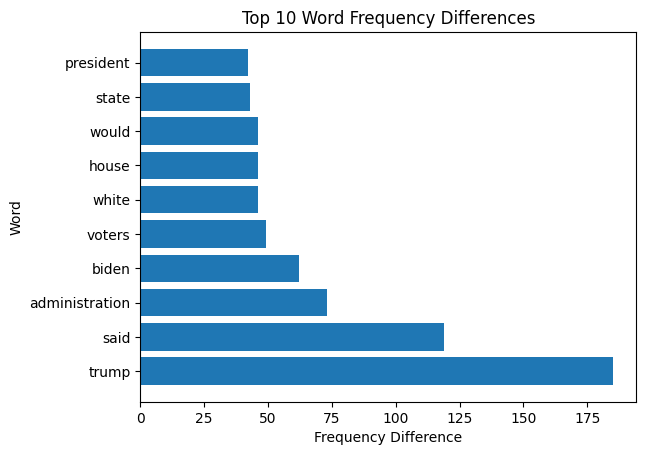

In [78]:
group_1 = combined_df[combined_df['label'] == 1]['text']
group_0 = combined_df[combined_df['label'] == 0]['text']

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    words = nltk.word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return words

group_1_words = group_1.apply(preprocess).sum()
group_0_words = group_0.apply(preprocess).sum()

group_1_freq = Counter(group_1_words)
group_0_freq = Counter(group_0_words)

# Find the differences in word frequencies
common_words = set(group_1_freq.keys()).union(set(group_0_freq.keys()))
word_diff = {word: group_1_freq[word] - group_0_freq[word] for word in common_words}

# Sort by absolute difference
sorted_diff = sorted(word_diff.items(), key=lambda x: abs(x[1]), reverse=True)

# Create a DataFrame for visualization
diff_df = pd.DataFrame(sorted_diff, columns=['Word', 'Frequency Difference'])
diff_df['Word'] = diff_df['Word'].astype(str)
diff_df = diff_df[(diff_df['Word'] != 'ap') & (diff_df['Word'] != 'also') & (diff_df['Word'] != 'file')]

# Visualize top 10 differences
top_diff = diff_df.head(10)
plt.barh(top_diff['Word'], top_diff['Frequency Difference'])
plt.xlabel('Frequency Difference')
plt.ylabel('Word')
plt.title('Top 10 Word Frequency Differences')
plt.show()

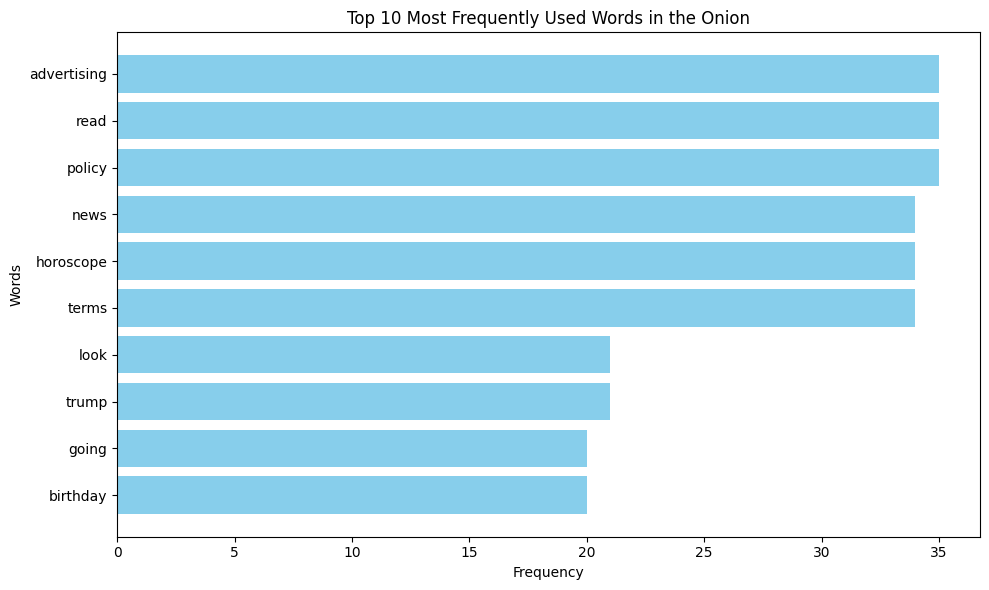

In [99]:
top_20_words0 = group_0_freq.most_common(10)
# Split words and their counts for plotting
words, counts = zip(*top_20_words0)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Frequently Used Words in the Onion')
plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent on top
plt.tight_layout()
plt.show()

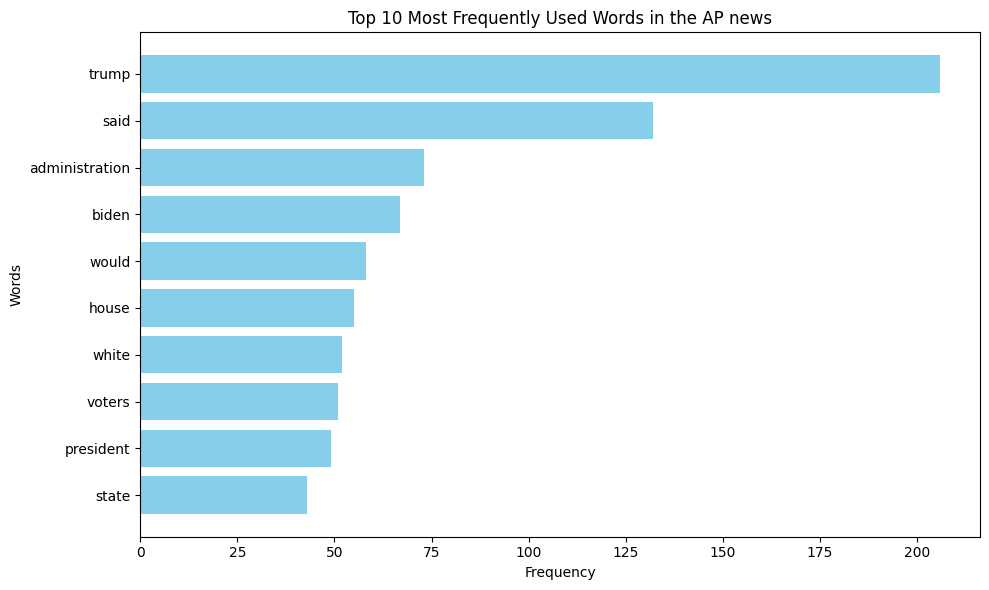

In [100]:
words_to_remove = {'file', 'also', 'ap'}
for word in words_to_remove:
    if word in group_1_freq:
        del group_1_freq[word]

top_20_words1 = group_1_freq.most_common(10)
# Split words and their counts for plotting
words, counts = zip(*top_20_words1)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Frequently Used Words in the AP news')
plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent on top
plt.tight_layout()
plt.show()

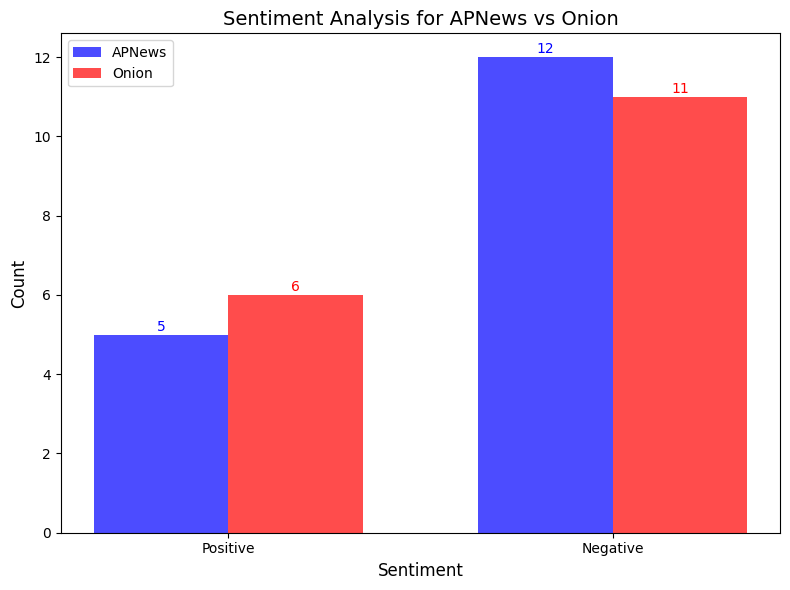

In [81]:
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt


# Split data into label 1 and label 0
label_1_texts = combined_df[combined_df['label'] == 1]['text'].tolist()
label_0_texts = combined_df[combined_df['label'] == 0]['text'].tolist()

# Initialize the sentiment analysis pipeline for the first model
model_1 = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english', truncation=True)


# Perform sentiment analysis for Label 1
label_1_sentiment_model_1 = model_1(label_1_texts)

# Perform sentiment analysis for Label 0
label_0_sentiment_model_1 = model_1(label_0_texts)

# Aggregate results for each label
def aggregate_sentiments(sentiments):
    positive = sum(1 for s in sentiments if s['label'] == 'POSITIVE')
    negative = sum(1 for s in sentiments if s['label'] == 'NEGATIVE')
    return {'Positive': positive, 'Negative': negative}

label_1_results = aggregate_sentiments(label_1_sentiment_model_1)
label_0_results = aggregate_sentiments(label_0_sentiment_model_1)

# Prepare data for visualization
categories = ['Positive', 'Negative']
label_1_counts = [label_1_results[cat] for cat in categories]
label_0_counts = [label_0_results[cat] for cat in categories]

# Visualization
x = range(len(categories))  # Create X-axis positions
width = 0.35  # Bar width

plt.figure(figsize=(8, 6))
plt.bar(x, label_1_counts, width, label='APNews', color='blue', alpha=0.7)
plt.bar([p + width for p in x], label_0_counts, width, label='Onion', color='red', alpha=0.7)

# Customize the chart
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Sentiment Analysis for APNews vs Onion', fontsize=14)
plt.xticks([p + width/2 for p in x], categories)  # Center labels between bars
plt.legend()

# Add value labels on the bars
for i in range(len(categories)):
    plt.text(x[i], label_1_counts[i] + 0.1, str(label_1_counts[i]), ha='center', fontsize=10, color='blue')
    plt.text(x[i] + width, label_0_counts[i] + 0.1, str(label_0_counts[i]), ha='center', fontsize=10, color='red')

plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ashash/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


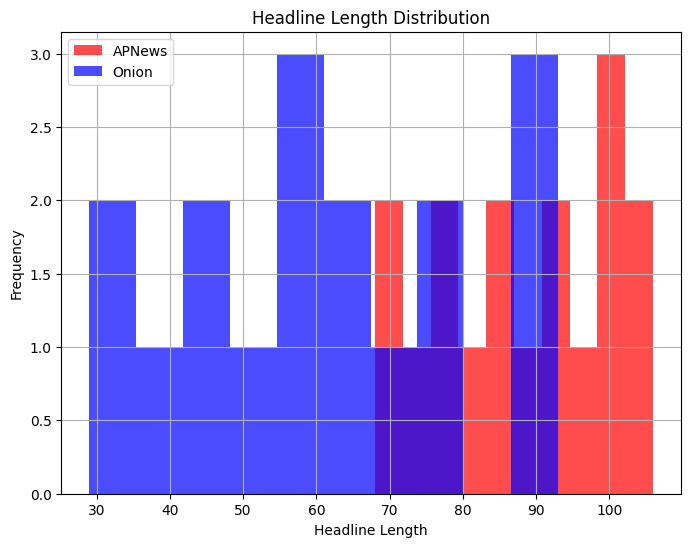

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


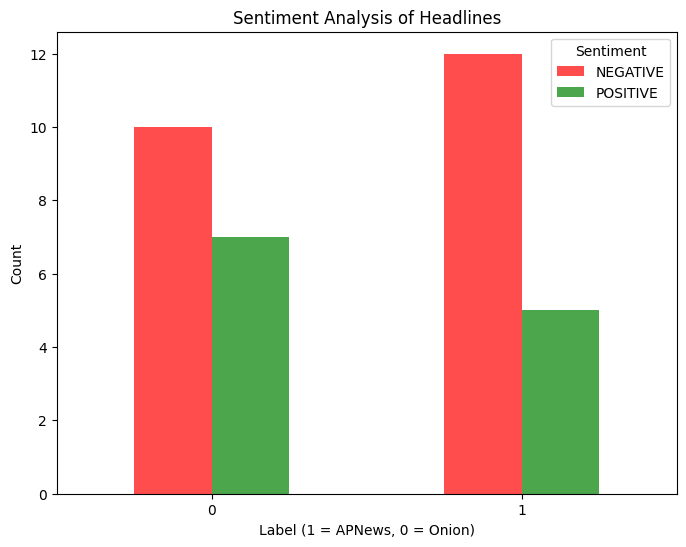

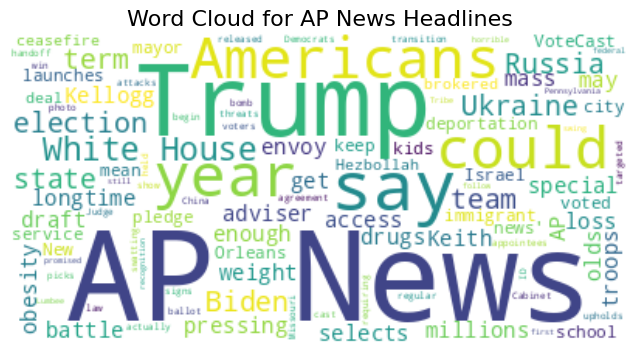

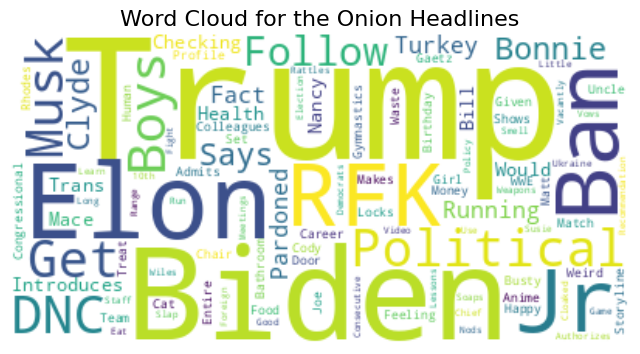

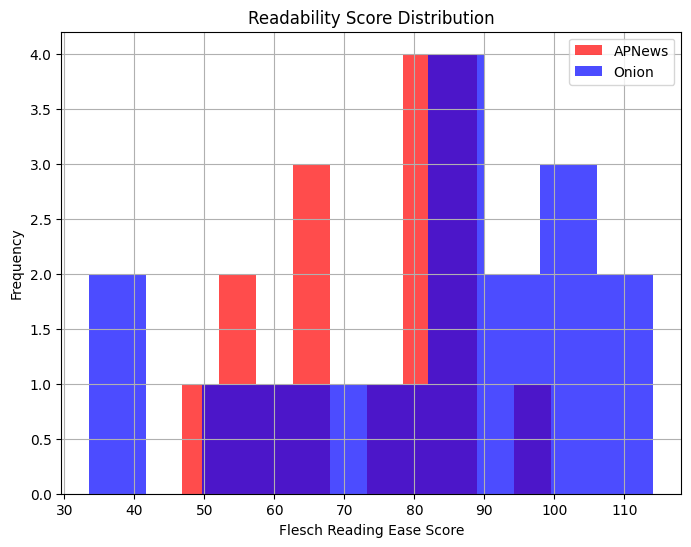

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from textstat import flesch_reading_ease

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


# Split data by label
misinfo_headlines = combined_df[combined_df['label'] == 1]['title']
credible_headlines = combined_df[combined_df['label'] == 0]['title']

# 1. Analyze Headline Length
combined_df['headline_length'] = combined_df['title'].apply(len)

# Plot Headline Length Distribution
plt.figure(figsize=(8, 6))
combined_df[combined_df['label'] == 1]['headline_length'].hist(alpha=0.7, color='red', label='APNews')
combined_df[combined_df['label'] == 0]['headline_length'].hist(alpha=0.7, color='blue', label='Onion')
plt.title('Headline Length Distribution')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 2. Sentiment Analysis of Headlines
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

combined_df['sentiment'] = combined_df['title'].apply(lambda x: sentiment_pipeline(x)[0]['label'])

# Plot Sentiment Distribution
sentiment_counts = combined_df.groupby(['label', 'sentiment']).size().unstack()
sentiment_counts.plot(kind='bar', figsize=(8, 6), color=['red', 'green', 'blue'], alpha=0.7)
plt.title('Sentiment Analysis of Headlines')
plt.xlabel('Label (1 = APNews, 0 = Onion)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title="Sentiment")
plt.show()

# 3. Word Frequency Analysis
def generate_wordcloud(text, title):
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=100).generate(' '.join(text))
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

generate_wordcloud(misinfo_headlines, "Word Cloud for AP News Headlines")
generate_wordcloud(credible_headlines, "Word Cloud for the Onion Headlines")

# 4. Readability Scores
combined_df['readability'] = combined_df['title'].apply(flesch_reading_ease)

# Compare Readability Scores
plt.figure(figsize=(8, 6))
combined_df[combined_df['label'] == 1]['readability'].hist(alpha=0.7, color='red', label='APNews')
combined_df[combined_df['label'] == 0]['readability'].hist(alpha=0.7, color='blue', label='Onion')
plt.title('Readability Score Distribution')
plt.xlabel('Flesch Reading Ease Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ashash/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


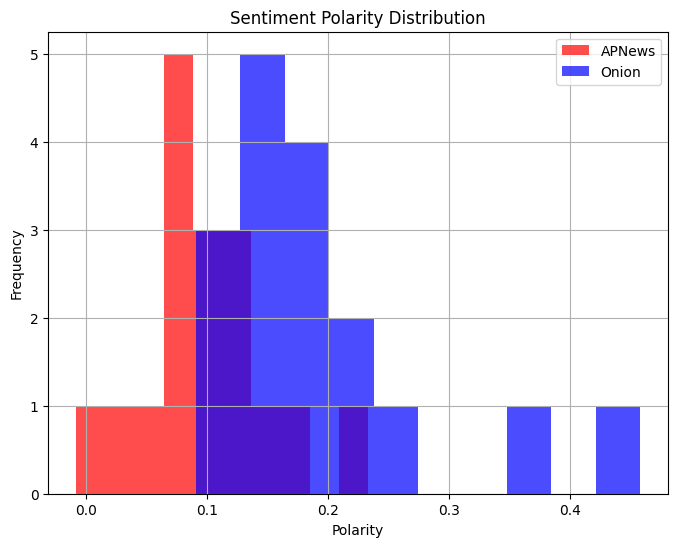

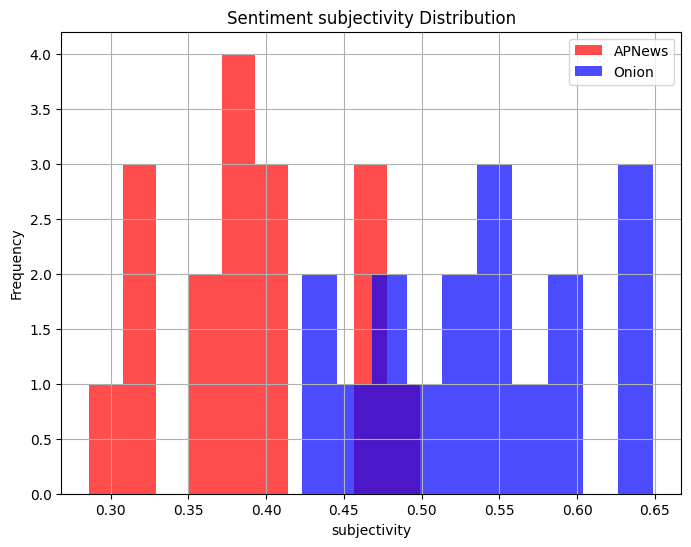

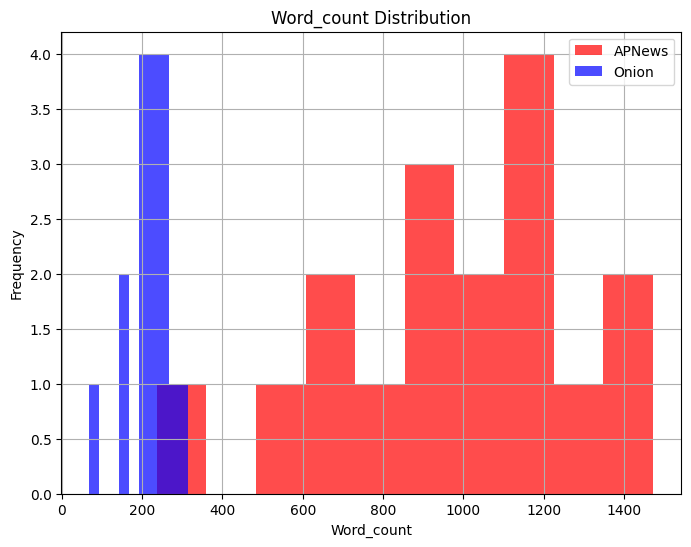

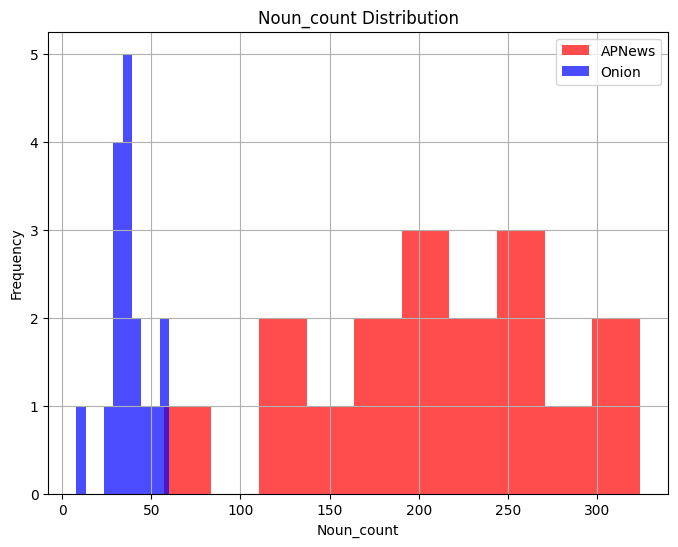

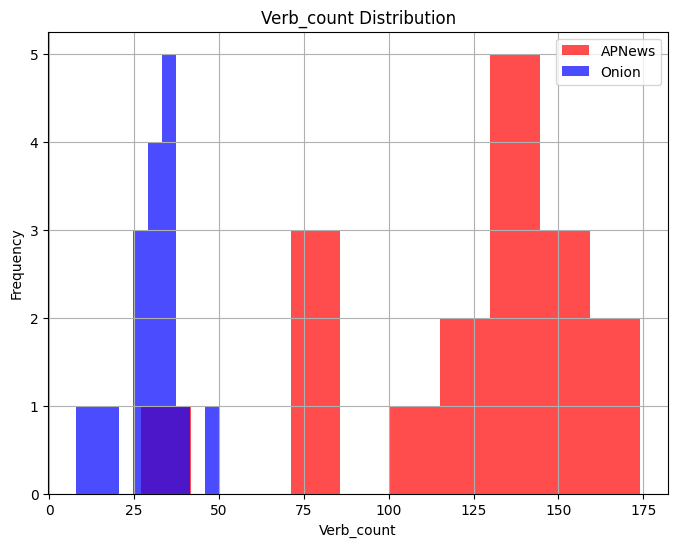

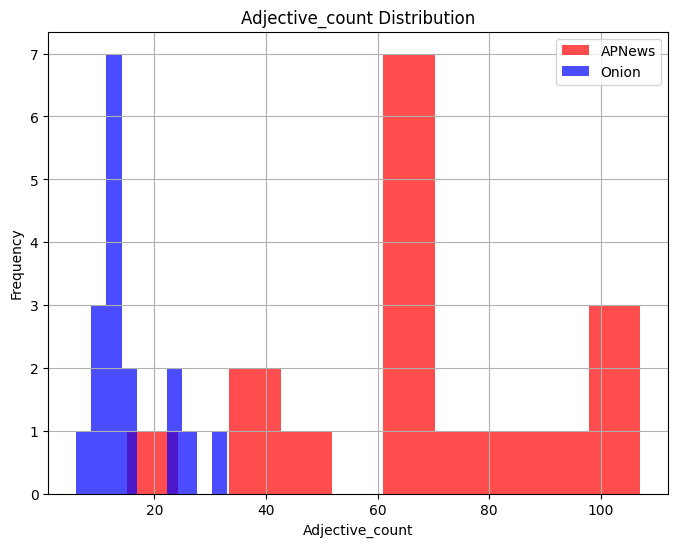

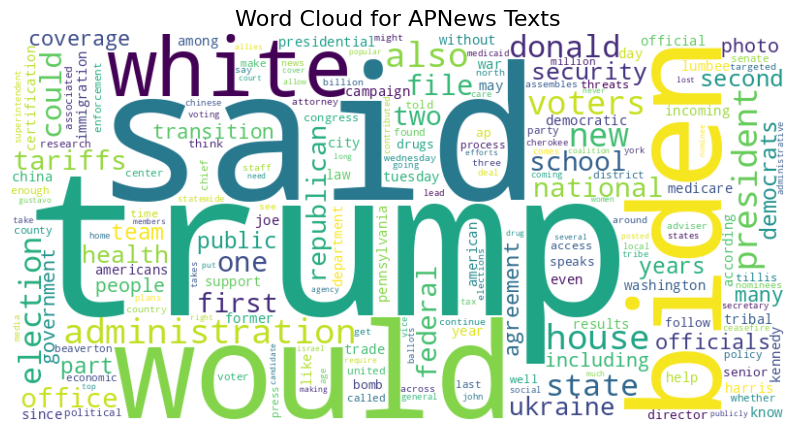

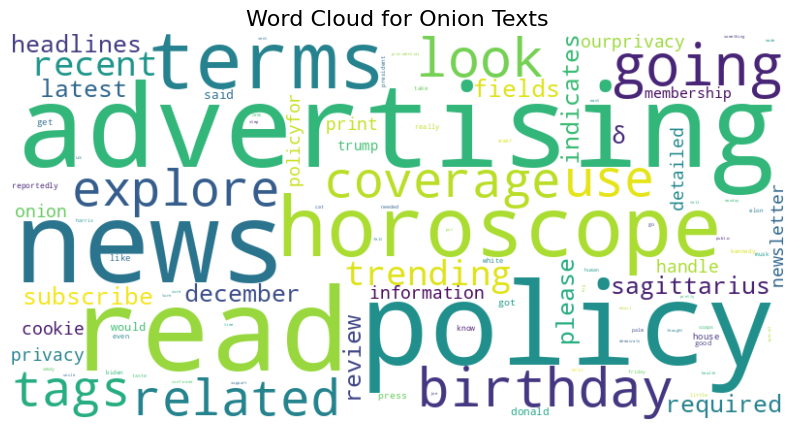

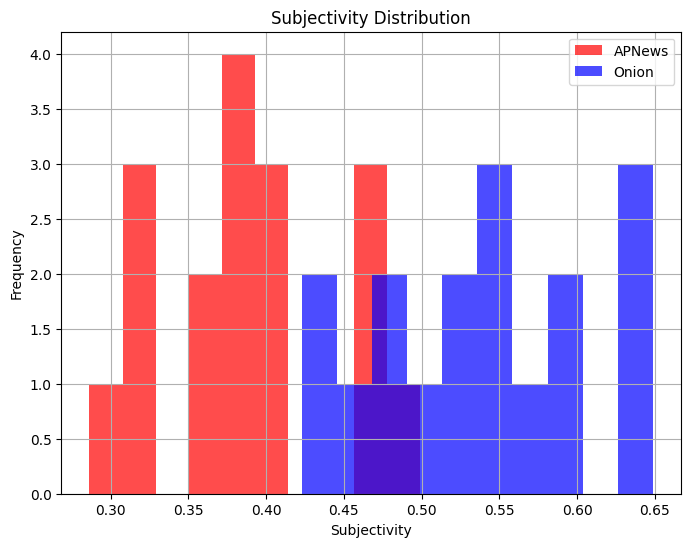

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import spacy
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df = pd.read_csv('combined_news.csv')
# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

# 1. Sentiment Analysis using TextBlob
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

df['polarity'], df['subjectivity'] = zip(*df['text'].apply(analyze_sentiment))

# Plot Sentiment Polarity
plt.figure(figsize=(8, 6))
df[df['label'] == 1]['polarity'].hist(alpha=0.7, color='red', label='APNews')
df[df['label'] == 0]['polarity'].hist(alpha=0.7, color='blue', label='Onion')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
df[df['label'] == 1]['subjectivity'].hist(alpha=0.7, color='red', label='APNews')
df[df['label'] == 0]['subjectivity'].hist(alpha=0.7, color='blue', label='Onion')
plt.title('Sentiment subjectivity Distribution')
plt.xlabel('subjectivity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 2. Linguistic Feature Extraction with SpaCy
def extract_linguistic_features(text):
    doc = nlp(text)
    word_count = len([token.text for token in doc if token.is_alpha])
    noun_count = len([token.text for token in doc if token.pos_ == "NOUN"])
    verb_count = len([token.text for token in doc if token.pos_ == "VERB"])
    adjective_count = len([token.text for token in doc if token.pos_ == "ADJ"])
    return word_count, noun_count, verb_count, adjective_count

df['word_count'], df['noun_count'], df['verb_count'], df['adjective_count'] = zip(*df['text'].apply(extract_linguistic_features))

# Plot Linguistic Features
linguistic_features = ['word_count', 'noun_count', 'verb_count', 'adjective_count']
for feature in linguistic_features:
    plt.figure(figsize=(8, 6))
    df[df['label'] == 1][feature].hist(alpha=0.7, color='red', label='APNews')
    df[df['label'] == 0][feature].hist(alpha=0.7, color='blue', label='Onion')
    plt.title(f'{feature.capitalize()} Distribution')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# 3. Word Frequency Analysis
def get_word_frequencies(texts):
    words = [word.lower() for text in texts for word in text.split() if word.isalpha() and word.lower() not in stop_words]
    return Counter(words)

misinfo_word_freq = get_word_frequencies(df[df['label'] == 1]['text'])
credible_word_freq = get_word_frequencies(df[df['label'] == 0]['text'])

# Generate Word Clouds
def generate_wordcloud(word_freq, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

generate_wordcloud(misinfo_word_freq, "Word Cloud for APNews Texts")
generate_wordcloud(credible_word_freq, "Word Cloud for Onion Texts")

# 4. Psycholinguistic Attributes using TextBlob
def extract_psycholinguistic_features(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

df['polarity'], df['subjectivity'] = zip(*df['text'].apply(extract_psycholinguistic_features))

# Visualize Subjectivity Distribution
plt.figure(figsize=(8, 6))
df[df['label'] == 1]['subjectivity'].hist(alpha=0.7, color='red', label='APNews')
df[df['label'] == 0]['subjectivity'].hist(alpha=0.7, color='blue', label='Onion')
plt.title('Subjectivity Distribution')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [104]:
df['noun_ratio'] = df['noun_count'] / df['word_count']
df['verb_ratio'] = df['verb_count'] / df['word_count']
df['adjective_ratio'] = df['adjective_count'] / df['word_count']


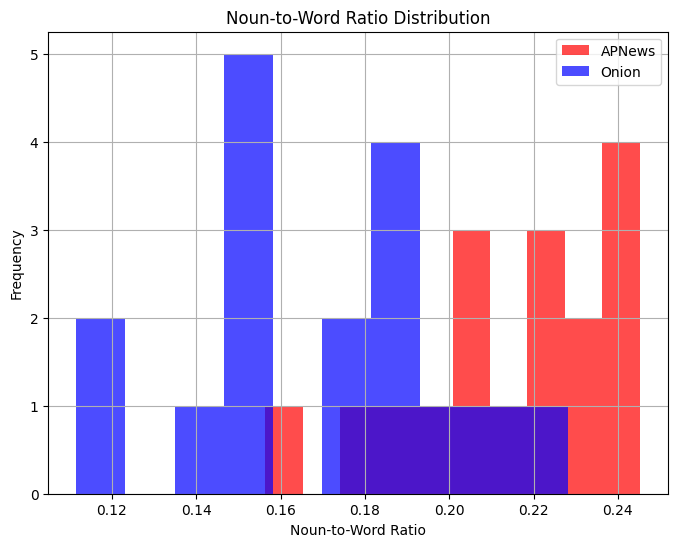

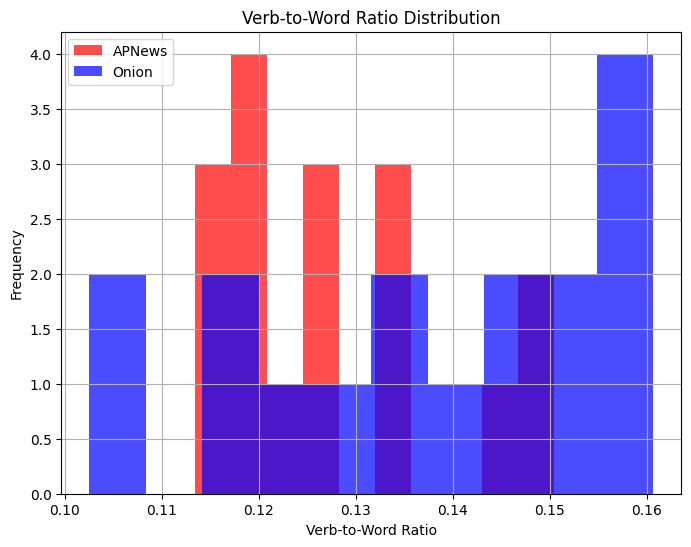

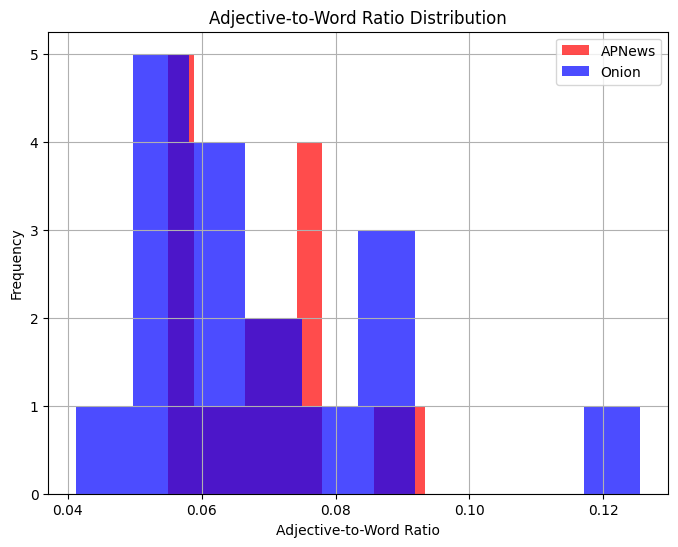

In [105]:
# Define the linguistic features to analyze
linguistic_features = ['noun_ratio', 'verb_ratio', 'adjective_ratio']
labels = ['Noun-to-Word Ratio', 'Verb-to-Word Ratio', 'Adjective-to-Word Ratio']

# Import required library
import matplotlib.pyplot as plt

# Generate histograms for each normalized linguistic feature
for feature, label in zip(linguistic_features, labels):
    plt.figure(figsize=(8, 6))
    # Plot AP News data
    df[df['label'] == 1][feature].hist(alpha=0.7, color='red', label='APNews', bins=10)
    # Plot The Onion data
    df[df['label'] == 0][feature].hist(alpha=0.7, color='blue', label='Onion', bins=10)
    
    # Add plot details
    plt.title(f'{label} Distribution')
    plt.xlabel(label)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


In [93]:
print(combined_df['text'].head())


0     WASHINGTON—Participating in the annual tradit...
1     Robert F. Kennedy Jr., Donald Trump’s pick to...
2     WASHINGTON—With widespread support from her R...
3     President-elect Donald Trump selected Matt Ga...
4     PALM BEACH, FL—Revealing that the stage was f...
Name: text, dtype: object


In [96]:
import nltk
from nltk import word_tokenize, pos_tag
from nltk.tokenize import sent_tokenize
from itertools import chain
from collections import Counter

# Ensure NLTK resources are downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Preprocess text for POS tagging
def preprocess_text(text):
    try:
        print(f"Processing text: {text[:100]}...")  # Debugging: Show the first 100 characters
        sentences = nltk.sent_tokenize(text)  # Split into sentences
        pos_sequences = []
        for sentence in sentences:
            tokens = word_tokenize(sentence)  # Tokenize each sentence
            pos_tags = pos_tag(tokens)  # Get POS tags
            pos_sequences.extend([tag for _, tag in pos_tags])  # Collect POS tags
        return pos_sequences
    except Exception as e:
        print(f"Error processing text: {text}")
        print(e)
        return []

# Clean the dataset
combined_df = combined_df.dropna(subset=['text'])  # Remove rows with NaN
combined_df = combined_df[combined_df['text'].apply(lambda x: isinstance(x, str))]  # Keep only strings
combined_df['clean_text'] = combined_df['text'].str.replace('[^\w\s]', '', regex=True)  # Remove special chars

# Analyze POS patterns
onion_pos = combined_df[combined_df['label'] == 0]['clean_text'].apply(preprocess_text)
ap_pos = combined_df[combined_df['label'] == 1]['clean_text'].apply(preprocess_text)

# Flatten lists
flattened_onion_pos = list(chain.from_iterable(onion_pos))
flattened_ap_pos = list(chain.from_iterable(ap_pos))

# Count POS frequencies
onion_pos_freq = Counter(flattened_onion_pos)
ap_pos_freq = Counter(flattened_ap_pos)

# Output frequencies
print("The Onion POS frequencies:", onion_pos_freq.most_common(10))
print("AP News POS frequencies:", ap_pos_freq.most_common(10))



Processing text:  WASHINGTONParticipating in the annual tradition one last time before leaving office President Joe B...
Error processing text:  WASHINGTONParticipating in the annual tradition one last time before leaving office President Joe Biden reportedly told a pardoned Thanksgiving turkey Youre the Bonnie to my Clyde on Monday before running off with it and disappearing over the horizon Its us against the world now turkey said the commanderinchief grabbing the bird by the wing and laughing wildly as the two of them fled the White House grounds in a convertible the turkeys handlers in hot pursuit Theyre going to keep coming after us you know but Ive got your back and I know youve got mine Itll be just you me and the wide open road together until the end Dont worry Ive got a cozy little place in Delaware we can hide out in until things die down At press time Biden urged the turkey to take the wheel so that he could fend off the Secret Service agents on their tail Advertising Explor

[nltk_data] Downloading package punkt to /Users/ashash/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ashash/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
